# Error Backpropagation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import numpy as np
import matplotlib.pyplot as plt


## 1. 실습용 데이터 생성

In [3]:
np.set_printoptions(suppress = True, precision = 3)

### 1) Input: X(4 * 3)

In [4]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

### 2) Output: y(4 * 1)

In [5]:
y = np.array([0., 1., 1., 0.]).reshape(4, 1)

y

array([[0.],
       [1.],
       [1.],
       [0.]])

### 3) W1 (3 * 4)

In [6]:
np.random.seed(2045)

W1 = np.random.rand(3, 4)

W1

array([[0.844, 0.886, 0.139, 0.061],
       [0.192, 0.532, 0.155, 0.827],
       [0.92 , 0.015, 0.49 , 0.692]])

### 4) W2 (4 * 1)

In [9]:
np.random.seed(2046)
W2 = np.random.rand(4).reshape(4, 1)

W2

array([[0.895],
       [0.596],
       [0.436],
       [0.153]])

### 5) y_hat(4 * 1)

In [8]:
np.random.seed(2045)

y_hat = np.random.rand(4).reshape(4, 1)

y_hat

array([[0.844],
       [0.886],
       [0.139],
       [0.061]])

### 6) Layer1 (4 * 4)

In [10]:
Layer1 = np.ones([4, 4])

Layer1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## 2. 함수 정의

### 1) sigmoid()
- Activation Function

In [11]:
def sigmoid(x) :
  y = 1 / (1 + np.exp(-x))
  return y

### 2) d_sigmoid()
- sigmoid() 미분함수

In [12]:
def d_sigmoid(x) :
  dy = x * (1.0 - x)
  return dy

### 3) Loss Function
- Mean Squared Error / Binary Cross Entropy

In [13]:
def loss_function(y, y_hat, error = "MSE") :
  if error == "MSE" :
    Loss = np.mean((y - y_hat) ** 2)
  elif error == "CEE" :
    Loss = -np.mean(y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))

  return Loss

## 3. 순방향과 역방향 함수 정의

### 1) Forward_Propagation

- Layer1 Output
  - Layer1 = sigmoid(np.dot(X, W1))
- y_hat Output
  - y_hat = sigmoid(np.dot(Layer1, W2))

In [14]:
def forwardProp(X, W1, Layer1, W2, y_hat) :
  Layer1 = sigmoid(np.dot(X, W1))
  y_hat = sigmoid(np.dot(Layer1, W2))

  return Layer1, y_hat

### 2) Back_Propagation

In [16]:
def backProp(X, y, y_hat, Layer1, W1, W2) :
  d_W2 = np.dot(np.transpose(Layer1), (-2 * (y - y_hat) * d_sigmoid(y_hat)))

# -2 * (y - y_hat) : 오차값 (값 자체가 중요한 것이 아니므로, 편하게 하려고 -2 를 곱함
# 계산상의 편의를 위해 -2를 곱한 것

  d_W1 = np.dot((-2 * (y - y_hat) * d_sigmoid(y_hat)), np.transpose(W2))
  d_W1 = d_W1 * d_sigmoid(Layer1)
  d_W1 = np.dot(np.transpose(X) , d_W1)
  # 두단계로 나눠 계산
  

  W1 = W1 - 0.8 * d_W1
  W2 = W2 - 0.8 * d_W2

  return y_hat, Layer1, W1, W2

## 4. 오차역전파를 적용한 Gradient Descent
- 학습과정의 Loss 값 저장 객체

In [15]:
Loss_Record = []

### 1) Learning with Error Backpropagation

In [17]:
for k in range(0, 1000) :
  Layer1, y_hat = forwardProp(X, W1, Layer1, W2, y_hat)
  y_hat, Layer1, W1, W2 = backProp(X, y, y_hat, Layer1, W1, W2)

  Loss_Record.append(loss_function(y, y_hat, error = "CEE"))

### 2) Parameter Update Check

In [18]:
W1

array([[ 2.165,  4.556,  6.252, -4.313],
       [ 2.453,  4.884, -2.953,  6.58 ],
       [ 1.547, -0.552,  0.307,  1.498]])

In [19]:
W2

array([[ 3.89 ],
       [ 7.401],
       [-7.353],
       [-7.362]])

In [25]:
y_hat

y_hat.round()

array([[0.],
       [1.],
       [1.],
       [0.]])

### 3) Visualization

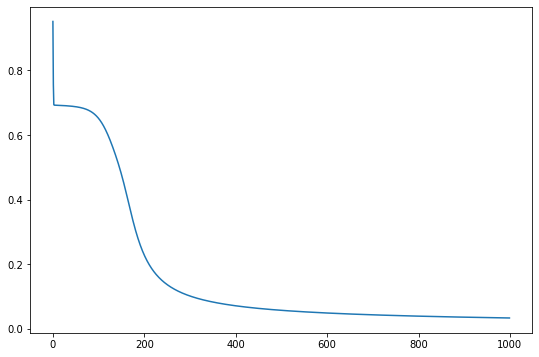

In [23]:
plt.figure(figsize = (9, 6))
plt.plot(Loss_Record)
plt.show()